# 300_Analysis

In [1]:
# libraries must be installed before importing
import gensim
import pickle
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
## load in universal dictionary 
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')

## load in petition corpus and model
corpus1 = pickle.load(open('petitions_corpus.pkl', 'rb'))
lda1 = gensim.models.ldamodel.LdaModel.load('petitions_model.gensim')

#load in transcript corpus and model 
corpus2 = pickle.load(open('tscript_corpus.pkl', 'rb'))
lda2 = gensim.models.ldamodel.LdaModel.load('tscript_model.gensim')



## 301 - Similarity of topic distributions in models

In [7]:
# similarity of topics
# Jaccard distance provides distance/difference between distributions
# similarity 1-differnce 
diff, annotation = lda1.diff(lda2, 'jaccard', num_words=(100), annotation= True)
topic_sim = 1-diff

In [11]:
# create a data frame for topic similarities (lda1,lda2)
topic_sim= pd.DataFrame.from_records(topic_sim)
# change the index to reflect 
topics= np.arange(1,21)
topic_sim.index= topics
topic_sim.columns= topics
topic_sim.to_pickle('topic_sim.pickle')
topic_sim

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,0.080192,0.124585,0.059125,0.066068,0.101999,0.038760,0.109439,0.116967,0.087377,0.116967,0.052260,0.052260,0.116967,0.101999,0.101999,0.059125,0.101999,0.073090,0.073090,0.073090
2,0.188953,0.094646,0.080192,0.066068,0.109439,0.045472,0.101999,0.101999,0.140095,0.032121,0.052260,0.059125,0.087377,0.101999,0.101999,0.080192,0.109439,0.101999,0.087377,0.073090
3,0.080192,0.080192,0.087377,0.059125,0.140095,0.032121,0.094646,0.101999,0.094646,0.066068,0.080192,0.052260,0.132294,0.101999,0.087377,0.052260,0.087377,0.094646,0.080192,0.066068
4,0.124585,0.140095,0.132294,0.101999,0.180558,0.052260,0.155984,0.172265,0.087377,0.059125,0.109439,0.080192,0.147992,0.172265,0.172265,0.101999,0.269521,0.180558,0.094646,0.087377
5,0.188953,0.080192,0.101999,0.094646,0.132294,0.087377,0.101999,0.132294,0.080192,0.087377,0.087377,0.094646,0.164075,0.101999,0.109439,0.045472,0.109439,0.124585,0.059125,0.066068
6,0.132294,0.116967,0.101999,0.087377,0.188953,0.052260,0.180558,0.197455,0.132294,0.038760,0.066068,0.059125,0.172265,0.172265,0.101999,0.080192,0.172265,0.101999,0.124585,0.094646
7,0.132294,0.094646,0.101999,0.094646,0.155984,0.073090,0.147992,0.147992,0.101999,0.052260,0.073090,0.080192,0.214783,0.140095,0.116967,0.080192,0.214783,0.094646,0.116967,0.094646
8,0.087377,0.101999,0.059125,0.066068,0.223614,0.019062,0.164075,0.109439,0.101999,0.000000,0.052260,0.006285,0.180558,0.101999,0.109439,0.052260,0.132294,0.101999,0.080192,0.045472
9,0.155984,0.116967,0.140095,0.101999,0.214783,0.066068,0.147992,0.206064,0.124585,0.059125,0.094646,0.059125,0.214783,0.155984,0.124585,0.080192,0.180558,0.132294,0.132294,0.094646
10,0.124585,0.080192,0.032121,0.038760,0.080192,0.045472,0.080192,0.116967,0.094646,0.045472,0.038760,0.066068,0.094646,0.124585,0.073090,0.066068,0.080192,0.094646,0.066068,0.073090


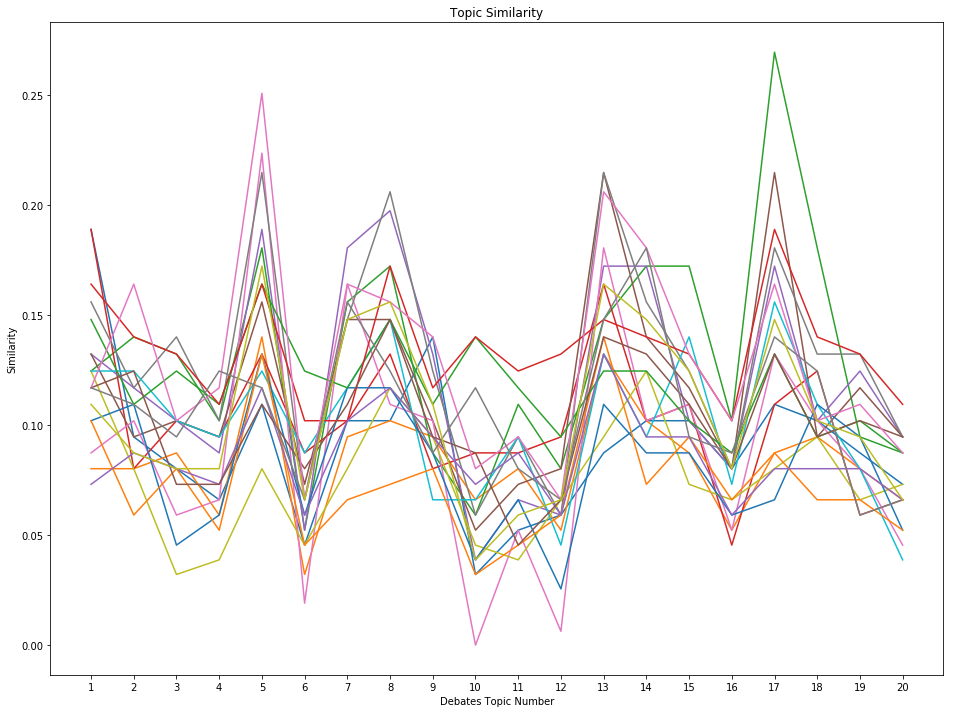

In [13]:

# Plot of topic similarity between 
fig, ax = plt.subplots(figsize=(16, 12))
ax.set(xlabel='Debates Topic Number', ylabel='Similarity',
       title='Topic Similarity')
ax.xaxis.set_ticks(np.arange(1, 21, 1))
for i in range(1, 20):
    x = np.arange(1,21)
    y = topic_sim.iloc[i]   
    ax.plot(x, y)

fig.savefig("Topic_Similarity_Graph.png")
plt.show()

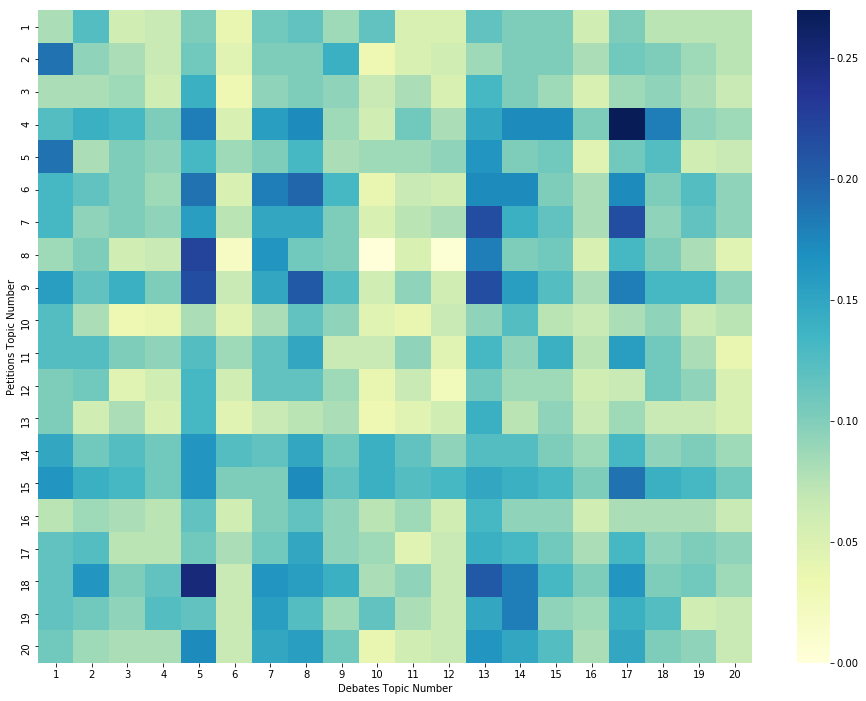

In [6]:
# heatmap showing similarity in topics between 
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(ax=ax, data= topic_sim, cmap="YlGnBu")
plt.xlabel('Debates Topic Number')
plt.ylabel('Petitions Topic Number')
plt.savefig('topic_similarity.png')
plt.show()

## 302 - Method for finding the similarity of documents

In [54]:
## test simlarity of documents

lda_vec1= lda1[corpus1[1]]
lda_vec2 = lda2[corpus2[4]]
similarity = gensim.matutils.cossim(lda_vec1, lda_vec2)
similarity

0.6303504618286427

# 303 - Petitions Analysis

## A.   Dominant topic in each sentence

In [13]:
def dom_topics(ldamodel, corpus, texts):

    topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
       
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topics_df = topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    topics_df = pd.concat([topics_df, contents], axis=1)
    return(topics_df)

In [14]:
petitions_topic_keywords = dom_topics(lda1, corpus1, dictionary)

In [20]:
# Format
petitions_dominant_topic = petitions_topic_keywords.reset_index()
petitions_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Document']

# Show
petitions_dominant_topic.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Document
0,0,0.0,0.7220,"people, government, service, country, british,...",0.0
1,1,4.0,0.6852,"government, people, child, petition, would, co...",1.0
2,2,6.0,0.8359,"people, government, animal, child, health, wou...",2.0
3,3,15.0,0.5883,"people, government, country, animal, public, f...",3.0
4,4,8.0,0.7802,"child, government, parent, people, petition, w...",4.0


 ### B.Most representative documents for each topic 

In [16]:
# Group top 5 documents under each topic
petitions_topics_sorteddf = pd.DataFrame()

petitions_topics_outdf_grpd = petitions_topic_keywords.groupby('Dominant_Topic')

for i, grp in petitions_topics_outdf_grpd:
    petitions_topics_sorteddf = pd.concat([petitions_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(5)], 
                                            axis=0)

# Reset Index    
petitions_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
petitions_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Document"]

# Show
petitions_topics_sorteddf.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Document
0,0.0,0.9887,"people, government, service, country, british,...",597.0
1,0.0,0.9878,"people, government, service, country, british,...",2999.0
2,0.0,0.9873,"people, government, service, country, british,...",6093.0
3,0.0,0.9870,"people, government, service, country, british,...",2496.0
4,0.0,0.9870,"people, government, service, country, british,...",5004.0
5,1.0,0.9873,"government, would, people, petition, crime, vi...",4211.0
6,1.0,0.9868,"government, would, people, petition, crime, vi...",10141.0
7,1.0,0.9868,"government, would, people, petition, crime, vi...",4798.0
8,1.0,0.9868,"government, would, people, petition, crime, vi...",2616.0
9,1.0,0.9864,"government, would, people, petition, crime, vi...",1878.0


In [17]:
tempdf = petitions_topics_sorteddf.loc[petitions_topics_sorteddf.Topic_Num == 1]

tempdf.Keywords[5]

'government, would, people, petition, crime, victim, year, sentence, council, system'

In [18]:
## Save dfs to pickle file 
petitions_topics_sorteddf.to_pickle('petitions_topics_sorteddf.pickle')

# 304 - Transcripts Analysis

## A.   Dominant topic in each sentence

In [ ]:
tscript_topic_keywords = dom_topics(lda2, corpus2, dictionary)

In [ ]:
# Format
tscript_dominant_topic = tscript_topic_keywords.reset_index()
tscript_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Document']

# Show
tscript_dominant_topic.head()

 ### B.Most representative documents for each topic 

In [ ]:
# Group top 5 documents under each topic
tscript_topics_sorteddf = pd.DataFrame()

tscript_topics_outdf_grpd = tscript_topic_keywords.groupby('Dominant_Topic')

for i, grp in tscript_topics_outdf_grpd:
    tscript_topics_sorteddf = pd.concat([tscript_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(5)], 
                                            axis=0)

# Reset Index    
tscript_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
tscript_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Document"]

# Show
tscript_topics_sorteddf.head()

In [ ]:
## Save dfs to pickle file 
tscript_topics_sorteddf.to_pickle('tscript_topics_sorteddf.pickle')

In [ ]:
tscript_topics_sorteddf.head()